In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:>

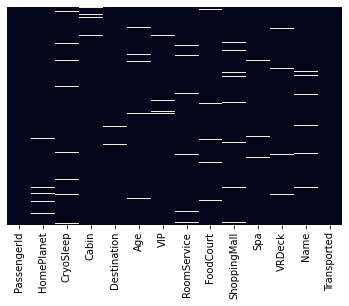

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [35]:
def cleandata(data):
    df = data.copy()
    
    df["VIP"] = df["VIP"].astype(bool)
    df["VIP"] = df["VIP"].astype(int)
    
    df["CryoSleep"] = df["CryoSleep"].astype(bool)
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    df["Transported"] = df["Transported"].astype(int)
    
    df.drop(['PassengerId', 'Name','Cabin'],axis=1,inplace=True)
    
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
    df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
    
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
    df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())
    df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
    df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
    df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
    
    return df

In [5]:
train_df = cleandata(train)

In [6]:
categories = ['HomePlanet', 'Destination']
len(categories)

2

In [7]:
def category_onehot_multcols(multcolumns, final):
    df_final=final
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final[fields],drop_first=True)
        
        final.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final,df_final],axis=1)
        
    return df_final

In [8]:
traindf = category_onehot_multcols(categories, train_df)

HomePlanet
Destination


In [9]:
traindf.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(traindf, test_size=0.2, random_state=42)

In [11]:
y_train = train_set['Transported']
X_train = train_set.drop(['Transported'], axis=1)

y_val = test_set['Transported']
X_val = test_set.drop(['Transported'], axis=1)

In [27]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
2333,0,28.0,0,0.000000,55.0,0.0,656.0,0.0,0,0,0,1
2589,0,17.0,0,0.000000,1195.0,31.0,0.0,0.0,0,0,0,1
8302,1,28.0,0,0.000000,0.0,0.0,0.0,0.0,1,0,0,0
8177,0,20.0,0,224.687617,2.0,289.0,976.0,0.0,0,1,0,1
500,1,36.0,0,0.000000,0.0,0.0,0.0,0.0,1,0,0,0


In [12]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [13]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [14]:
vals = model.predict(X_val)

In [16]:
vals

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, vals)

0.7745830937320299

In [20]:
test = pd.read_csv('test.csv')

In [23]:
test_df = cleandata(test)

In [24]:
testdf = category_onehot_multcols(categories, test_df)

HomePlanet
Destination


In [25]:
testdf.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0,0,0,1


<AxesSubplot:>

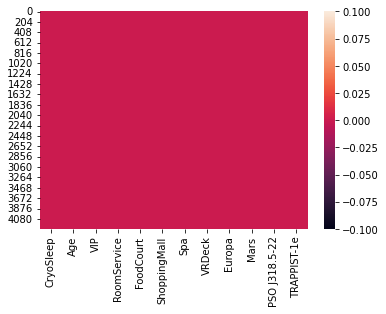

In [26]:
sns.heatmap(testdf.isnull())

In [28]:
preds = model.predict(testdf)

In [29]:
testids = test['PassengerId']
subdf = pd.DataFrame({"PassengerId":testids.values,
                      "Transported":preds})

In [30]:
subdf.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [31]:
subdf.to_csv('sub01.csv')

In [33]:
trainnew = pd.get_dummies(train, columns=['HomePlanet','Destination'], drop_first=True)

In [34]:
trainnew

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0,0,0
8689,9278_01,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,1,0
8690,9279_01,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0,1
8691,9280_01,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0,0,0


In [36]:
train01 = cleandata(trainnew)

KeyError: 'HomePlanet'